In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# load images
print("reading images")
img1 = cv2.imread('one.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, dsize=(460, 640), interpolation=cv2.INTER_AREA)

img2 = cv2.imread('two.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, dsize=(460, 640), interpolation=cv2.INTER_AREA)


reading images


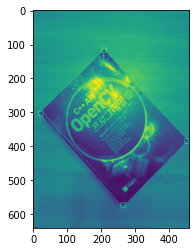

In [132]:
img1_patches = []

img1_corners = [(22, 303), (208, 118), (264, 573), (451, 384)]
for y, x in img1_corners :
  cv2.rectangle(img1, (y-7, x-7), (y+7, x+7), (255,0,0), 1)
  img1_patches.append(img1[x-7-1:x+7, y-7-1:y+7])
  # img1_patches.append(img1[x-4-1:x+5, y-4-1:y+5])

plt.imshow(img1)

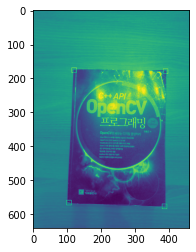

In [133]:
img2_patches = []

img2_corners = [(120, 176), (388, 179), (105, 565), (385, 576)]
for y, x in img2_corners :
  cv2.rectangle(img2, (y-7, x-7), (y+7, x+7), (255,0,0), 1)
  img2_patches.append(img2[x-7-1:x+7, y-7-1:y+7])
  # img2_patches.append(img2[x-4-1:x+5, y-4-1:y+5])


plt.imshow(img2)

In [134]:
# calculate img1_patches's gradient direction and gradient magnitude
img1_gradient_direction = []
img1_gradient_magnitude = []

for x in img1_patches:
  x = np.float32(x)/255.0
  gx = cv2.Sobel(x, cv2.CV_32F, 1, 0, ksize = 1)
  gy = cv2.Sobel(x, cv2.CV_32F, 0, 1, ksize = 1)

  mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
  img1_gradient_direction.append(angle)
  img1_gradient_magnitude.append(mag)


In [135]:
# calculate img2_patches's gradient direction and gradient magnitude
img2_gradient_direction = []
img2_gradient_magnitude = []

for x in img2_patches:
  x = np.float32(x)/255.0
  gx = cv2.Sobel(x, cv2.CV_32F, 1, 0, ksize = 1)
  gy = cv2.Sobel(x, cv2.CV_32F, 0, 1, ksize = 1)

  mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
  img2_gradient_direction.append(angle)
  img2_gradient_magnitude.append(mag)

In [136]:
# fill vector bins
def add_count_histogram(vector, dir, mag):
  if dir >= 180:
    dir = dir - 180
  share = int(dir/20)
  remainder = dir%20

  if remainder == 0:
    vector[0][share] += mag  
  elif share == 8:
    vector[0][share] += mag/20.0 * (20 - remainder)
    vector[0][0] += mag/20.0 * remainder
  else :
    vector[0][share] += mag/20.0 * (20 - remainder)
    vector[0][share+1] += mag/20.0 * remainder

# draw histograms of gradient
img1_histograms = []
for i in range(0,4):
  vector = np.zeros((1,9))
  for x in range(0,15):
    for y in range(0,15):
      add_count_histogram(vector, img1_gradient_direction[i][x][y], img1_gradient_magnitude[i][x][y])

  img1_histograms.append(vector.reshape((9, 1)))

img2_histograms = []
for i in range(0,4):
  vector = np.zeros((1,9))
  for x in range(0,15):
    for y in range(0,15):
      add_count_histogram(vector, img2_gradient_direction[i][x][y], img2_gradient_magnitude[i][x][y])

  img2_histograms.append(vector.reshape((9, 1)))


img1 histograms of gradient


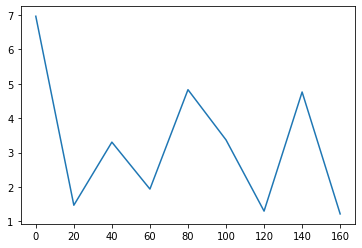

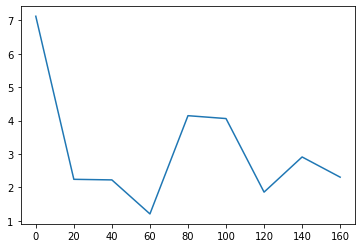

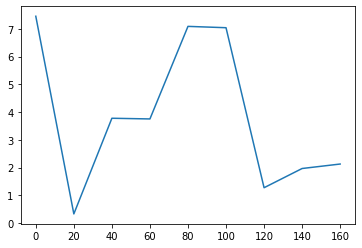

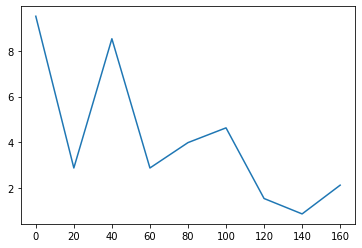

In [137]:
bins = [0,20,40,60,80,100,120,140,160]

print("img1 histograms of gradient")

for y in img1_histograms:
  plt.plot(bins, y)
  plt.show()


img2 histograms of gradient


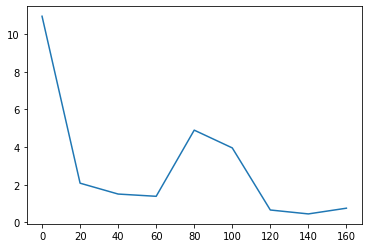

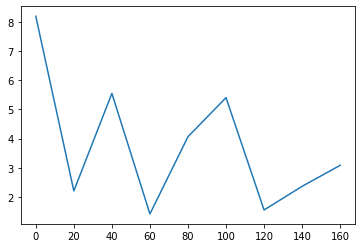

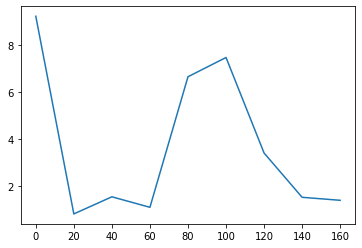

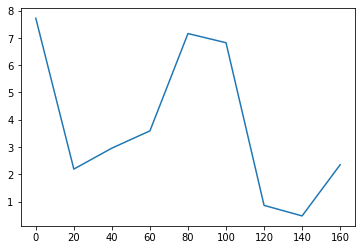

In [138]:
print("img2 histograms of gradient")

for y in img2_histograms:
  plt.plot(bins, y)
  plt.show()

In [141]:
# point 0 from img1 is similiar with point 0 from img2
print(np.mean(img1_histograms[0] - img2_histograms[0]))
print(np.mean(img1_histograms[0] - img2_histograms[1]))
print(np.mean(img1_histograms[0] - img2_histograms[2]))
print(np.mean(img1_histograms[0] - img2_histograms[3]))

0.2795969271618454
-0.5197328404109511
-0.4555260620804298
-0.5539589597222704
